PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64


C:\Users\000GS6744\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


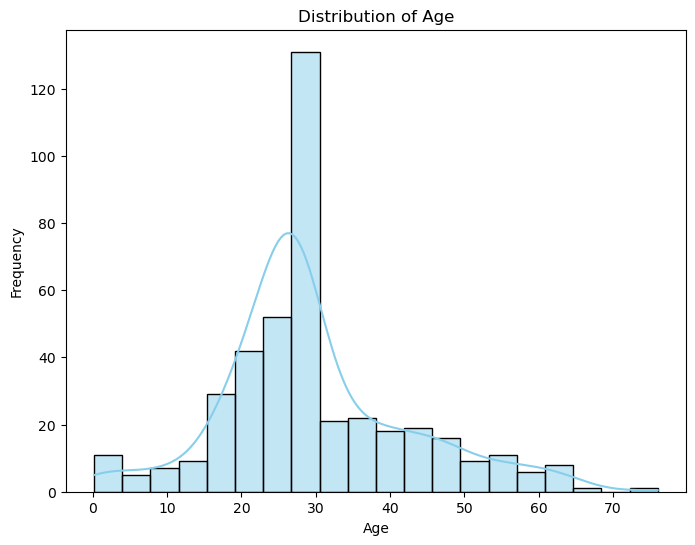

AttributeError: 'int' object has no attribute 'startswith'

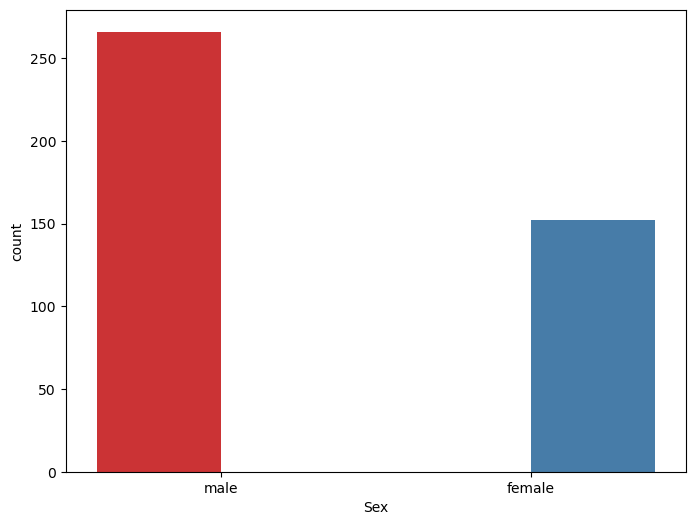

In [1]:
#Task2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
test_df = pd.read_csv(r"C:\Users\000GS6744\Documents\Nadhisha\test.csv")
gender_submission_df = pd.read_csv(r"C:\Users\000GS6744\Documents\Nadhisha\gender_submission.csv")
train_df = pd.read_csv(r"C:\Users\000GS6744\Documents\Nadhisha\train.csv")

# Merge test_df with gender_submission_df
test_df = test_df.merge(gender_submission_df, on='PassengerId')

# Replace infinite values with NaN
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for missing values
print(test_df.isnull().sum())

# Handle missing values (Example: Impute missing values for Age)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Convert 'Survived' to a categorical type
test_df['Survived'] = test_df['Survived'].astype('category')

# Example: Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(test_df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Example: Analyzing survival rate by sex
plt.figure(figsize=(8, 6))
sns.countplot(data=test_df, x='Sex', hue='Survived', palette='Set1')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

# Example: Investigating correlation between variables
plt.figure(figsize=(10, 8))
sns.heatmap(test_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
